In [4]:
from deepface import DeepFace
from deepface.models.facial_recognition import Facenet 
import pandas as pd
import tensorflow as tf
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt

In [1]:
image = cv2.imread('./test/son-tung-hai-tu-2.webp')

# Resize ảnh (ví dụ: 500x500)
target_width = 500
target_height = 500

original_height, original_width = image.shape[:2]

# Tính tỷ lệ scale dựa trên chiều rộng và chiều cao
scale_width = target_width / original_width
scale_height = target_height / original_height

# Chọn tỷ lệ nhỏ hơn để giữ nguyên tỷ lệ ảnh
scale = min(scale_width, scale_height)

# Tính kích thước mới
new_width = int(original_width * scale)
new_height = int(original_height * scale)

# Resize ảnh
resized_image = cv2.resize(image, (new_width, new_height))

# Lưu ảnh sau khi resize (nếu cần)
cv2.imwrite('./output/resized_image.jpg', resized_image)


NameError: name 'cv2' is not defined

In [2]:
resized_image

NameError: name 'resized_image' is not defined

In [3]:
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))  # Chuyển BGR sang RGB
plt.title('Resized Image (Keep Aspect Ratio)')
plt.axis('off')  # Tắt trục tọa độ
plt.show()

NameError: name 'plt' is not defined

In [8]:
df = DeepFace.find(img_path=resized_image, db_path = './db_data', model_name='Facenet', distance_metric='cosine')

24-11-30 08:58:05 - Found 12 newly added image(s), 0 removed image(s), 0 replaced image(s).


Finding representations:  58%|█████▊    | 7/12 [00:04<00:01,  2.76it/s]

24-11-30 08:58:10 - 🔴 Exception while extracting faces from ./db_data\SonTung\sontung_20.jpg: Face could not be detected in ./db_data\SonTung\sontung_20.jpg.Please confirm that the picture is a face photo or consider to set enforce_detection param to False.


Finding representations: 100%|██████████| 12/12 [00:05<00:00,  2.12it/s]


24-11-30 08:58:11 - There are now 50 representations in ds_model_facenet_detector_opencv_aligned_normalization_base_expand_0.pkl
24-11-30 08:58:11 - Searching [[[179 184 196]
  [180 186 197]
  [178 184 195]
  ...
  [ 92  97  96]
  [103 108 108]
  [115 120 119]]

 [[179 185 196]
  [182 188 199]
  [179 185 196]
  ...
  [ 98 101 101]
  [109 112 112]
  [124 127 126]]

 [[178 184 195]
  [184 190 201]
  [183 189 200]
  ...
  [ 95  98  98]
  [107 109 109]
  [118 120 120]]

 ...

 [[231 223 224]
  [230 223 224]
  [229 223 224]
  ...
  [ 84  86  87]
  [ 88  90  92]
  [ 88  90  94]]

 [[224 218 219]
  [224 218 219]
  [224 218 219]
  ...
  [ 79  81  84]
  [ 79  80  85]
  [ 87  88  92]]

 [[221 215 216]
  [219 213 214]
  [217 211 212]
  ...
  [ 85  86  90]
  [ 87  88  92]
  [100 101 105]]] in 50 length datastore
24-11-30 08:58:11 - find function duration 6.502491474151611 seconds


In [9]:
df

[                      identity                                      hash  \
 0  ./db_data\haitu\haitu_4.jpg  60026c10f83fc4df3c555fd70dabc95d2d797831   
 1  ./db_data\haitu\haitu_5.jpg  bc40ecea5bc191cc8bc237b46a559bf6793dc57f   
 
    target_x  target_y  target_w  target_h  source_x  source_y  source_w  \
 0         0         0       120       149       285        29        51   
 1         0         0       123       149       285        29        51   
 
    source_h  threshold  distance  
 0        51        0.4  0.316640  
 1        51        0.4  0.363138  ,
                              identity  \
 0     ./db_data\SonTung\sontung_1.jpg   
 1    ./db_data\SonTung\sontung_15.jpg   
 2    ./db_data\SonTung\sontung_14.jpg   
 3     ./db_data\SonTung\sontung_2.jpg   
 4     ./db_data\SonTung\sontung_5.jpg   
 5     ./db_data\SonTung\sontung_7.jpg   
 6     ./db_data\SonTung\sontung_3.jpg   
 7    ./db_data\SonTung\sontung_16.jpg   
 8   ./db_data\SonTung\sontung_12.jpeg   
 9   ./d

0.316639544371631
0.21288609081661847


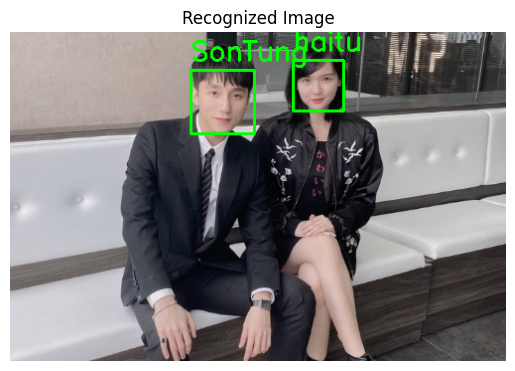

In [11]:
import matplotlib.pyplot as plt
import os
import cv2

for data in df:
    if not data.empty and (data['distance'][0] < 0.32):
        print(data['distance'][0])
        data['label'] = data['identity'].apply(lambda x: os.path.basename(os.path.dirname(x)))

        # Draw the bounding box around the recognized face
        x1, y1, w, h = int(data['source_x'][0]), int(data['source_y'][0]), int(data['source_w'][0]), int(data['source_h'][0])
        cv2.rectangle(resized_image, (x1, y1), (x1 + w, y1 + h), (0, 255, 0), 2)

        # Optional: Put the label near the bounding box
        cv2.putText(resized_image, data['label'][0], (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

        # Save the image
        cv2.imwrite('./output/recognized_image.jpg', resized_image)

        # Display the image using plt
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
plt.title('Recognized Image')
plt.axis('off')  # Turn off axis
plt.show()
